<a href="https://colab.research.google.com/github/sh-coding/-/blob/main/practices/practice-twoD_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (연습) 2차원 데이터 시각화

**기본 설정**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(8, 6))

붓꽃 데이터셋을 아래 방식으로 불러온다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

**참고**

`sklearn`은 사이킷런 라이브러리이며 머신러닝에 가장 중요한 라이브러리 중 하나다.

`load_iris()` 함수의 반환값은 사이킷런 라이브리가 제공하는 `Bunch` 자료형이다.

In [6]:
type(iris)

sklearn.utils._bunch.Bunch

`Bunch` 객체는 데이터셋을 사전 형식으로 담으며, 키를 객체의 속성처럼 다룰 수 있다.
사용된 키를 확인해보자.

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

이중에 붓꽃 데이터는 `'data'` 키가 가리키는 데이터프레임 객체며,
총 150개의 샘플이 각각 네 개의 특성을 갖는다.

| 특성 | 의미 |
| :--- | :--- |
| sepal length | 꽃받침 길이 |
| sepal width | 꽃받침 너비 |
| petal length | 꽃잎 길이 |
| petal width | 꽃잎 길이 |

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris.png?raw=true" style="width:700px"></div></p>

In [8]:
iris_data = iris['data']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


붓꽃의 품종 정보는 `target_names` 키가 가리킨다.

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

반면에 품종 데이터는 `'target'` 키가 가리키는 시리즈 객체다.
항목은 0, 1, 2 정수이지만, 실제로는 구분을 위한 범주형으로 특성이다.
각 숫자는 붓꽃의 품종을 가리킨다.

| 번호 | 품종 |
| :--- | :--- |
| 0 | 세토사(Iris setosa) |
| 1 | 버시컬러(Iris versicolor) |
| 2 | 버지니카(Iris verginica) |

In [12]:
iris_varieties = iris['target']
iris_varieties

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 분류

분류는 각 샘플 데이터에 대해 하나의 레이블을 할당한다.
붓꽃의 꽃잎 길이와 너비를 특성으로 사용해서
품종을 레이블로 사용한 결과를 그래프로 그리려고 한다.

**붓꽃 데이터 시각화**

시각화를 위해 꽃잎<font size='2'>petal</font>의 길이와 너비 두 개의 특성만 선택한다.

In [75]:
X = iris_data[["petal length (cm)", "petal width (cm)"]].values
y = iris_varieties.values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

**질문 1**

150개의 데이터는 처음부터 50개씩 각각 세토사, 버시컬러, 버지키나 품종의 데이터로 구성된다.

(1) 세토사, 버시컬ㄹ, 버지니카 각각의 품종으로 구성된 데이터프레임을 가리키는
세 개의 변수 `X_setosa`, `X_versicolor`, `X_verginica`를 선언하라.

In [74]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
X_setosa = X[y==0]
X_versicolor = X[y==1]
X_verginica = X[y==2]

X_setosa

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

(2) 각 데이터셋의 산점도를 다른 색을 이용하여 그려라.

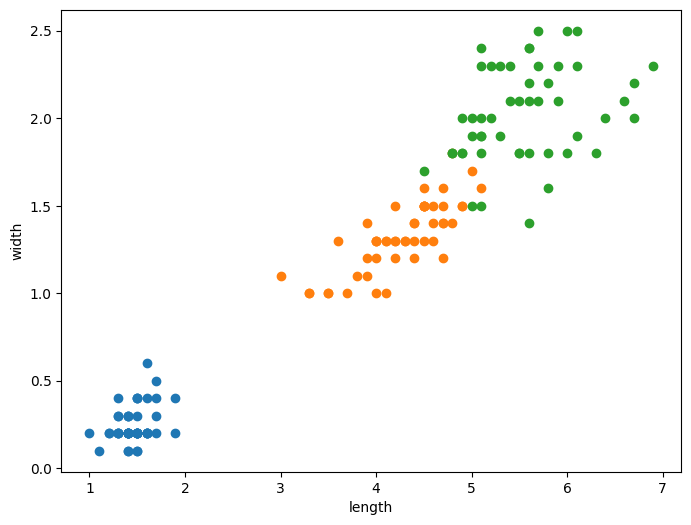

In [73]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa')
ax.scatter(X_versicolor[:,0],X_versicolor[:,1],label='versicolor')
ax.scatter(X_verginica[:,0],X_verginica[:,1],label='verginica')

ax.set_xlabel('length')
ax.set_ylabel('width')

plt.show()

(3) 범위를 x 축은 0에서 7.5 사이로, y 축은 0에서 3 사이로 지정한 다음에
축의 척도를 일치 시킨 후에 산점도를 다시 그려라.

힌트: `plt.gca().set_aspect("equal")` 활용

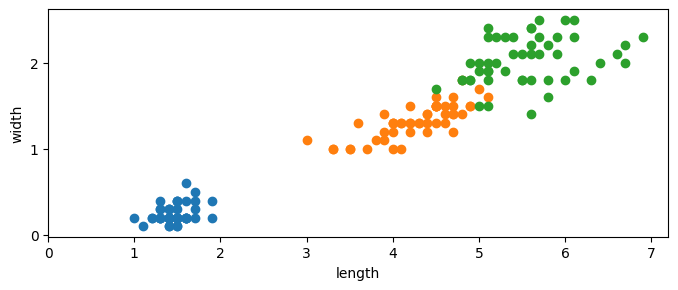

In [88]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa')
ax.scatter(X_versicolor[:,0],X_versicolor[:,1],label='versicolor')
ax.scatter(X_verginica[:,0],X_verginica[:,1],label='verginica')

ax.set_xlabel('length')
ax.set_ylabel('width')


ax.set_xticks(np.arange(0,7.5))
ax.set_yticks(range(0,3))
plt.gca().set_aspect("equal")

plt.show()


(4) 아래 그림과 같은 그래프를 그려라.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris_sep.png?raw=true" style="width:700px"></div></p>

힌트: 아래 코드 활용

In [110]:
# x 좌표
x0 = np.linspace(0, 7.5, 200)

# 두 개의 직선에 대한 y 좌표값
pred_1 = 5 * x0 - 12  # 직선 1의 y 좌표
pred_2 = -x0 + 6.5    # 직선 2의 y 좌표

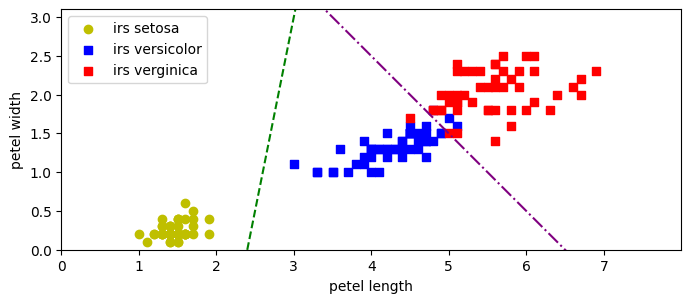

In [150]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa',c='#bfbf00')
ax.scatter(X_versicolor[:,0],X_versicolor[:,1],label='versicolor',c='blue',marker='s')
ax.scatter(X_verginica[:,0],X_verginica[:,1],label='verginica',c='red',marker='s')

ax.plot(x0, pred_1, label='setosa', c='green',linestyle='dashed')
ax.plot(x0, pred_2, label='versicolor', c='purple',linestyle='dashdot')

ax.set_xlim(0,8)
ax.set_ylim(0,3.1)

ax.set_xlabel('petel length')
ax.set_ylabel('petel width')

ax.set_xticks(np.arange(0,7.5))
ax.set_yticks(np.arange(0,3.1,0.5))

plt.gca().set_aspect("equal")

ax.legend(['irs setosa','irs versicolor','irs verginica'])

plt.show()

## 군집화

**군집**<font size='2'>cluster</font>은 유사한 대상들의 모음을 가리킨다.
예를 들어, 산이나 공원에서 볼 수 있는 이름은 모르지만 동일 품종의 꽃으로 이루어진 군집 등을
생각하면 된다.
**군집화**<font size='2'>clustering</font>는 대상들을 나누어 군집을
형성하는 것을 말한다.

각 샘플에 하나의 그룹을 할당한다는 점에서 분류와 유사하다.
하지만 각 샘플에 대해 레이블을 할당하는 게 아니라
유사한 샘플들의 군집으로 구분한다는 점에서 다르다.

(1) 아래 그림은 아이리스 붓꽃 데이터에 세토사 품종으로 구성된 군집과 나머지로 구성된 군집을 보여준다.
아래 그래프를 그리는 코드를 작성하라.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris_cluster.png?raw=true" style="width:700px"></div></p>

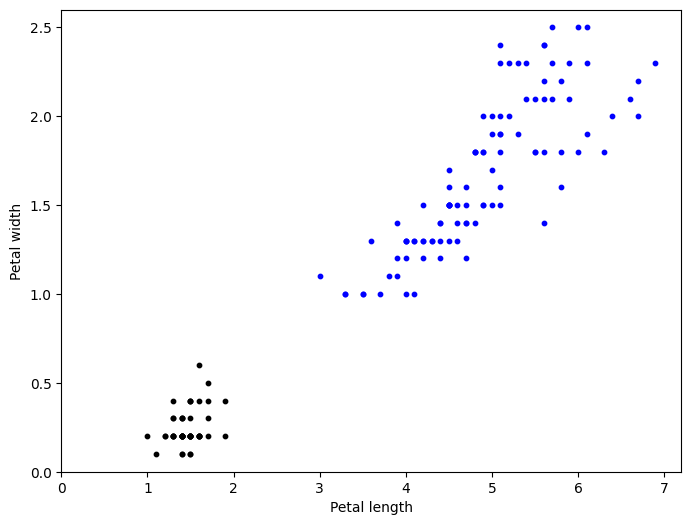

In [169]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')

ax.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa',c='black',s=10)
ax.scatter(X[y!=0][:,0],X[y!=0][:,1],label='other',c='blue',s=10)

ax.set_xlim(0,7.2)
ax.set_ylim(0,2.6)

plt.show()

## 서브플롯 활용

(1) 아래 그림은 아이리스 붓꽃 데이터에 대해 앞서 그린 분류와 군집화 그래프를 동시에 보여준다.
아래 그래프를 그리는 코드를 작성하라.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris_sep_cluster.png?raw=true" style="width:900px"></div></p>

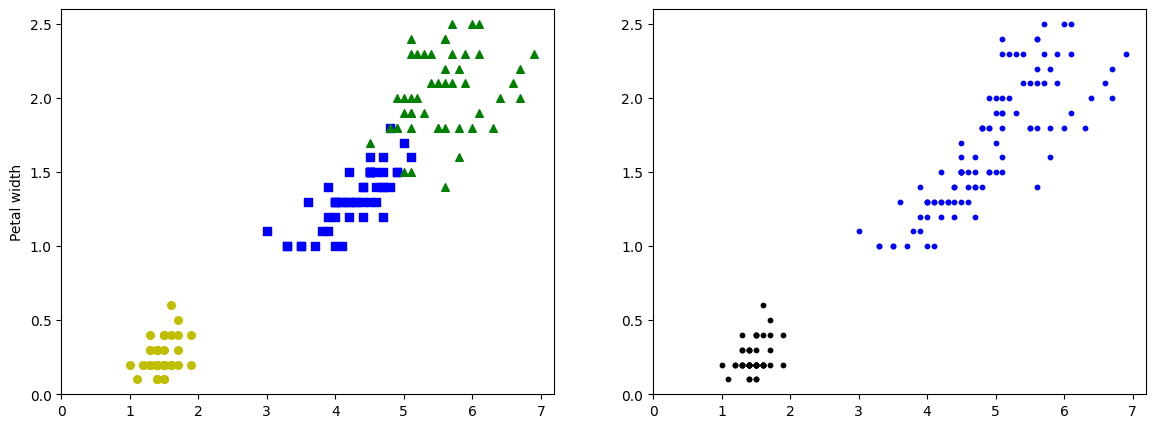

In [195]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,2)
ax1 = fig.add_subplot(1,2,1)


ax1.set_ylabel('Petal width')

ax.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa',c='black',s=10)
ax.scatter(X[y!=0][:,0],X[y!=0][:,1],label='other',c='blue',s=10)

ax.set_xlim(0,7.2)
ax.set_ylim(0,2.6)

ax1.scatter(X_setosa[:,0],X_setosa[:,1],label='setosa',c='#bfbf00',s=30)
ax1.scatter(X_versicolor[:,0],X_versicolor[:,1],label='versicolor',c='blue',marker='s',s=30)
ax1.scatter(X_verginica[:,0],X_verginica[:,1],label='verginica',c='green',marker='^',s=30)

ax1.set_xlim(0,7.2)
ax1.set_ylim(0,2.6)

plt.show()